### Luigi Module

In [143]:
import os
import sys
module_path = os.path.abspath(os.path.join("../.."))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from jupyter_notebook import load_parameters 

pars = load_parameters()

input_file = pars.get('input')
output_file = pars.get('output')

# Dealing with multiple outputs
histogram_file = pars.get('histogram')
dist_file = pars.get('dist')
summary_file = pars.get('summary')
violin_file = pars.get('violin')

dataset = pars.get('dataset')

In [180]:
import pandas as pd
import os

# data_folder = os.path.join('..', '..', 'data', 'stack-overflow')

# dataset = os.path.join(data_folder, 'Dataset - Pandas.csv')
# input_file = os.path.join(data_folder, 'pandas-preprocessedcode-dataset-part3')

# output_folder = os.path.join('..', '..', 'data', 'dataset')

In [181]:
dataset = pd.read_csv(dataset, sep=',')

code = pd.read_pickle(input_file)
code = code.set_index('Id')

# Filter only answers
dataset = dataset[dataset.AnswerId > 0]

### Dataset Solution Size

In [182]:
def solutions_amount(df):
    return pd.Series({'# of Solutions': len(df['Solution'])})

solution_amount_df = dataset.groupby('AnswerId', as_index=True).apply(solutions_amount)

LINE_SEP = '\n'

def solution_size(df):
    solution_series = df['Solution']
    count = 0
    for _,s in solution_series.iteritems():
        count += len(str(s).split(LINE_SEP))
    
    return pd.Series({'Solution Size': count})


solution_size_df = dataset.groupby('AnswerId', as_index=True).apply(solution_size) 


In [183]:
code_dataset = pd.merge(code, solution_amount_df, left_index=True, right_index=True, how='inner')
code_dataset = pd.merge(code_dataset, solution_size_df, left_index=True, right_index=True, how='inner')


### Snippet Size

In [184]:
code_dataset['Snippet Size'] = code_dataset['PreprocessedCode3'].apply(lambda x: len(x.split(os.linesep)))

### Histogram Plots

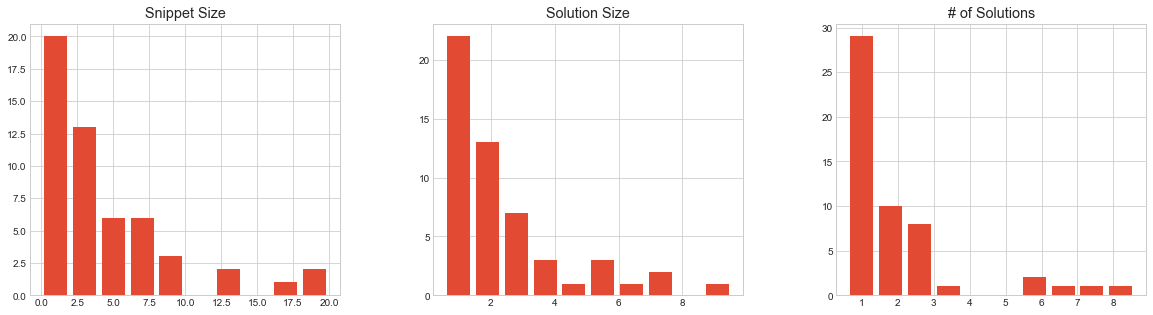

In [177]:
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns
sns.set_style("whitegrid")

plt.clf() 
# plt.style.use('ggplot')


fig, axes = plt.subplots(figsize=(20, 5), nrows=1, ncols=3, sharey=True)
    
code_dataset.hist('Snippet Size', align='left', rwidth=0.8, ax=axes[0])
code_dataset.hist('Solution Size', align='left', rwidth=0.8, ax=axes[1])
code_dataset.hist('# of Solutions', align='left', rwidth=0.8, ax=axes[2])

plt.savefig(os.path.join(histogram_file))
plt.show()

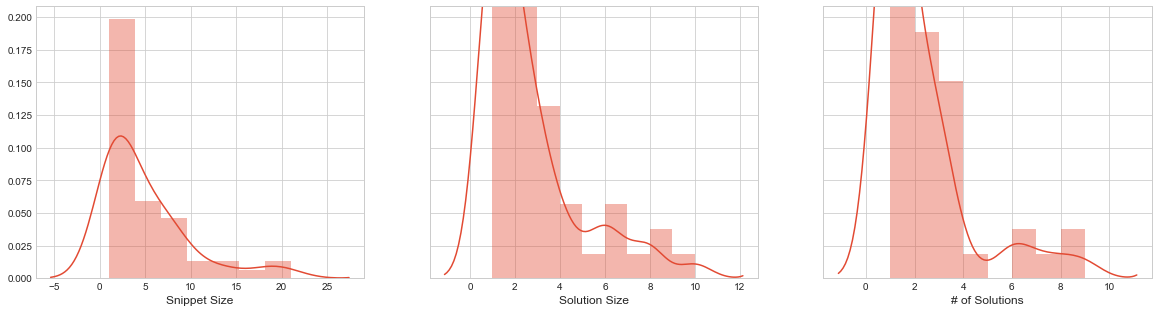

In [190]:
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns

sns.set_style("whitegrid")

plt.clf() 

fig, axes = plt.subplots(figsize=(20, 5), nrows=1, ncols=3)

sns.distplot(code_dataset['Snippet Size'], ax=axes[0])
sns.distplot(code_dataset['Solution Size'], ax=axes[1])
sns.distplot(code_dataset['# of Solutions'], ax=axes[2])

plt.savefig(os.path.join(dist_file))
plt.show()

### Summary as a csv

In [160]:
summary = code_dataset[['Snippet Size', 'Solution Size', '# of Solutions']].describe()
summary.to_csv(os.path.join(summary_file))

### Violin Plot

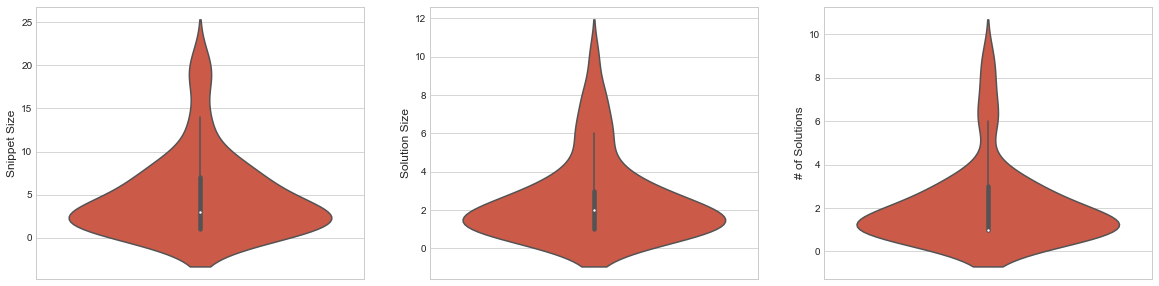

In [172]:
import seaborn as sns
sns.set_style("whitegrid")

plt.clf() 
fig, axes = plt.subplots(figsize=(20, 5), nrows=1, ncols=3, sharey=True)

sns.violinplot(y='Snippet Size', data=code_dataset, ax=axes[0])
sns.violinplot(y='Solution Size', data=code_dataset, ax=axes[1])
sns.violinplot(y='# of Solutions', data=code_dataset, ax=axes[2])


plt.savefig(os.path.join(violin_file))
plt.show()





### Output Token